<a href="https://colab.research.google.com/github/Isenlith/ANASIN/blob/master/Exerc%C3%ADcios_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho Final 2/2 - Parte Prática

Este trabalho deverá ser submetido na plataforma Moodle até o dia 30 de junho no endereço abaixo. O arquivo para entrega deverá estar em formato `.ipynb` (*IPython Notebook* ou *Jupyter Notebook*) contendo todos os gráficos e códigos referentes as soluções das atividades propostas. Aos que utilizarem o Colab, o arquivo pode ser obtido através do menu **File -> Download .ipynb**. Favor renomear o arquivo para `<seu_nome_completo>.ipynb`.

Endereço para entrega: https://moodle.ufcspa.edu.br/mod/assign/view.php?id=94638

O presente trabalho é composto por 4 questões, cada uma valendo 2.5 pontos. A nota do Trabalho Prático, representa 50% da nota final correspondente aos trabalhos teórico e prático, que representam 20% da média final da disciplina. **Ou seja**, este trabalho contará como 1 ponto na média final.

*Observações*:

- Em caso de plágio, ambos xs alunxs não receberão a pontuação referida. 
- Entregas em outros formatos serão consideradas não entregues.
- Dúvidas devem ser enviadas por e-mail (eliezer@ufcspa.edu.br).

In [0]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [22, 4]

## [2.5 pontos] Questão 1 - Sinais de Energia e de Potência

Podemos classificar sinais determinísticos como sinais de *potência* ou de *energia*. 

- *Sinais de Potência*:

  - São ditos todos os sinais contínuos ou discretos que são periódicos. 
  - O cálculo da potência de sinais contínuos, onde $x$ é o sinal e $T_0$ é o período, é dado pela sequinte integral:
  
  \begin{equation}
  P = \frac{1}{T_0} \int_{-\frac{T_0}{2}}^{\frac{T_0}{2}} |x(t)|^2 \ dt
  \end{equation}
  
  - O cálculo da potência de sinais discretos, onde $x$ é o sinal e $N$ é o período, é dado pela sequinte soma:
  
  \begin{equation}
  P = \frac{1}{N} \sum_{n = 0}^{N-1} |x[n]|^2 
  \end{equation}

- *Sinais de Energia*:

  - São ditos todos os sinais contínuos ou discretos que não são periódicos.
  - O cálculo da energia de sinais contínuos, onde $x$ é o sinal, é dado pela sequinte integral:
  
  \begin{equation}
  E =\int_{-\infty}^{\infty} |x(t)|^2 \ dt
  \end{equation}
  
   - O cálculo da energia de sinais discretos, onde $x$ é o sinal, é dado pela sequinte soma:
  
  \begin{equation}
  E = \sum_{n = -\infty}^{\infty} |x[n]|^2 
  \end{equation}
 
Sendo assim, escreva um trecho de código python que calcula a potência ou energia dos seguintes sinais:

a. Calcule a energia do sinal contínuo definido por:

\begin{equation}
x(t) = \left\{\begin{array}{2}
  t^2 \quad 0 \leq t \leq 4 \\
  0, \quad t \notin [0, 4]
  \end{array}\right.
\end{equation}

b. Calcule a energia do sinal discreto definido por:


|0 | 1 | 2 | 3 | 4  | 5| 6| 7|8| 9|10|11| 
|---|----|----|----|----|---|---|---|---|---|---|---|
|0 | 0 | -2| -1| 0  | 1| 2| 3| 4|0| 0|0|0|


c. Calcule a potência do sinal contínuo definido por:

\begin{equation}
x(t) = 4 \cos (10 \pi t)
\end{equation}

d. Calcule a potência do sinal discreto definido por:

\begin{equation}
x[n] = \cos \left[n \frac{\pi}{3}\right]
\end{equation}




*Observações*: para calcular a integral, utilize a biblioteca `sympy` e a função `sympy.integrate`


##Resolução da Questão 1

In [0]:
import sympy as sym

# Cálculo da energia do sinal contínuo da letra "a"

t = sym.symbols('t')                                                            # Variável simbólica

x = t**2                                                                        # Sinal no intervalo de 0 a 4

#Não será necessário calcular a função x(t) num intervalo diferente de [0,4],
#pois a função valerá zero, o que implica que a integral também terá valor zero.

E = sym.integrate(x**2, (t, 0, 4))                                              
print('Energia do sinal x_a(t): ', E)

# Cálculo da energia do sinal discreto da letra "b"

x = [0, 0, -2, -1, 0, 1, 2, 3, 4, 0, 0, 0]                                      # Sinal discreto

E = np.sum(np.power(x, 2))
print('Energia do sinal x_b(t): ', E)

# Cálculo da potência do sinal contínuo da letra "c"

x = 4*sym.cos(10*sym.pi*t)                                                      # Sinal periódico contínuo
w0 = 10*np.pi
T0 = 2*np.pi/w0

P = (1/T0) * sym.integrate(x**2, (t, -T0/2, T0/2))
print('Potência do sinal contínuo x_c(t): ', P)

# Cálculo da potência do sinal discreto da letra "d"

n = np.linspace(0, 10000, 10001)
x = np.cos(n * np.pi/3)                                                         # Sinal periódico discreto
W0 = np.pi/3
N = 2*np.pi/W0
x_2 = np.power(x, 2)                                                            # Elevando o sinal ao quadrado

P = (1/N) * np.sum(x_2[:int(N-1)])
print('Potência do sinal contínuo x_d(t): ', P)

Energia do sinal x_a(t):  1024/5
Energia do sinal x_b(t):  35
Potência do sinal contínuo x_c(t):  8.00000000000000
Potência do sinal contínuo x_d(t):  0.45833333333333337


## [2.5 pontos] Questão 2 - Convolução Discreta

*Convolução* é o nome dado a uma operação matemática entre dois sinais, cuja saída é um terceiro sinal. A operação de convolução dos sinais $x$ e $h$ é denotada pela seguinte expressão:

\begin{equation}
\hat{x}[n] = \sum_{k = -\infty}^{\infty} x[n] \cdot h[n - k]
\end{equation}

Anteriormente utilizamos a função `np.convolve` para realizar a convolução de dois sinais discretos $x$ e $h$. Desta vez, implemente a sua versão da função que realiza a convolução de dois sinais. Siga as instruções a seguir:

1. Construa um sinal $x$, que é definido por $x[n] = \sin (2 \cdot  \pi \cdot  \frac{1}{50} \cdot n) + \mathcal{N}(\sigma = 0.1, \mu = 0) \quad \text{onde, } n = \{n \in \mathcal{I} \ | \ 0 \leq n < 64 \}$;

2. Construa um sinal $h$, que é definido por $h[n] = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}(\frac{(n - \mu)}{\sigma})^2} \quad \text{onde, } n = \{n \in \mathcal{I} \ | \ 0 \leq n < 64 \}$, use $\mu = 32$ e $\sigma = 2$;

3. Crie e implemente uma função chamada `convoluir` que realiza a convolução entre dois sinais;

4. Compare os resultados obtidos com a função `np.convolve` e mostre que os resultados são semelhantes.

##Resolução da Questão 2

<StemContainer object of 3 artists>

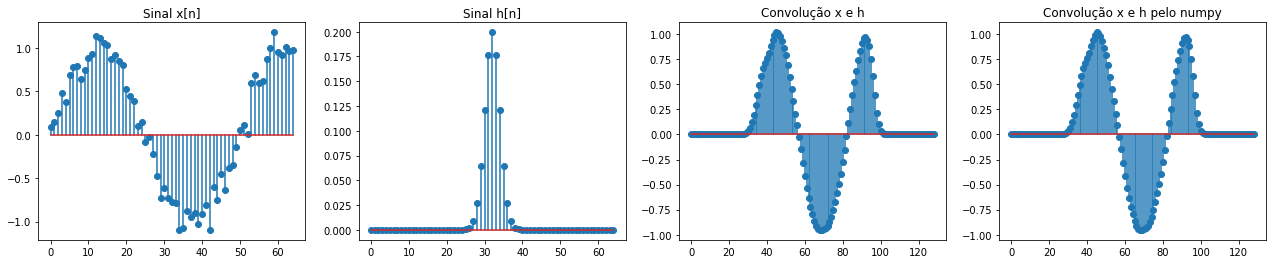

In [0]:
n = np.linspace(0, 64, 65)

#Construindo o sinal x
mu = 0
sigma = 0.1
ruido_white = np.random.randn(n.shape[0]) * sigma + mu
x = np.sin(2*np.pi*(1/50)*n) + ruido_white

#Construindo o sinal h
mu = 32
sigma = 2
h = (1/(sigma*np.sqrt(2*np.pi))) * np.exp((-1/2) * ((n - mu)/sigma)**2)

plt.subplot(1,4,1)
plt.title('Sinal x[n]')
plt.stem(n, x)
plt.subplot(1,4,2)
plt.title('Sinal h[n]')
plt.stem(n, h)

def convoluir(sinal_x, sinal_h):
  aux = len(sinal_x)
  aux2 = len(sinal_x) + len(sinal_h) - 1
  y = np.zeros(aux2)
  sinal_x = sinal_x.tolist()
  sinal_h = sinal_h.tolist()
  
  for n in range(aux2):
    for k in range(aux):
      if (n-k) < 0:
        y[n] = y[n] + 0
      else:
        try:                                                                    #Verifico se o indice existe
          a = sinal_x[k]
        except IndexError:                                                      #Se não existir, atribuo como nulo
          sinal_x.append(0)
          
        try:                                                                    #Verifico se o indice existe
          a = sinal_h[n - k]                                                    
        except IndexError:                                                      #Se não existir, atribuo como nulo
          sinal_h.append(0)
          
        y[n] = y[n] + sinal_x[k]*sinal_h[n - k]
    
  return y

y = convoluir(x, h)
y_py = np.convolve(x, h)

plt.subplot(1,4,3)
plt.title('Convolução x e h')
plt.stem(y)
plt.subplot(1,4,4)
plt.title('Convolução x e h pelo numpy')
plt.stem(y_py)

## [2.5 pontos] Questão 3 - Filtro de Sinais no Domínio da Frequência


A operação de convolução no domínio do tempo pode ser representada no domínio da frequência por uma multiplicação ponto a ponto entre os dois espectros de frequência. Esta abordagem reduz a complexidade computacional para aplicação de filtros digitais em sinais de uma ou mais dimensões, permitindo a utilização de filtros digitais em aplicações que executam em tempo real.

Sendo assim, utilizando os sinais $x$, $h$ construídos na Questão 2, realize o mesmo procedimento de convolução utilizando a Transformada de Fourier. Para isso, siga os passos abaixo:

1. Construa o espectro de frequência para os sinais $x$ e $h$ utilizando a transformada de Fourier;
2. Represente graficamente o espectro de cada um dos sinais, juntamente com os sinais originais;
3. Realize a multiplicação ponto a ponto dos dois espectros e represente graficamente o resultado obtido;
4. Aplique a Transformada Inversa de Fourier no espectro resultante da multiplicação;
5. Compare graficamente e numericamente o sinal transformado com o resultado da operação de convolução realizada anteriormente.

*Observação 1:* Utilize a função de transformada de Fourier de sua preferência (implementada por vocês ou a disponibilizada pela biblioteca `numpy` do Python).

*Observação 2*: os resultados não precisam ser idênticos, as regiões de extremos (bordas) do sinal podem variar já que o método de convolução pode ser calculado de diferentes formas.

*Dica*: A função `np.fft.fftshift` pode ser utilizada para inverter as metades do sinal. Será útil após realizar a transformada rápida inversa.


##Resolução da Questão 3

<StemContainer object of 3 artists>

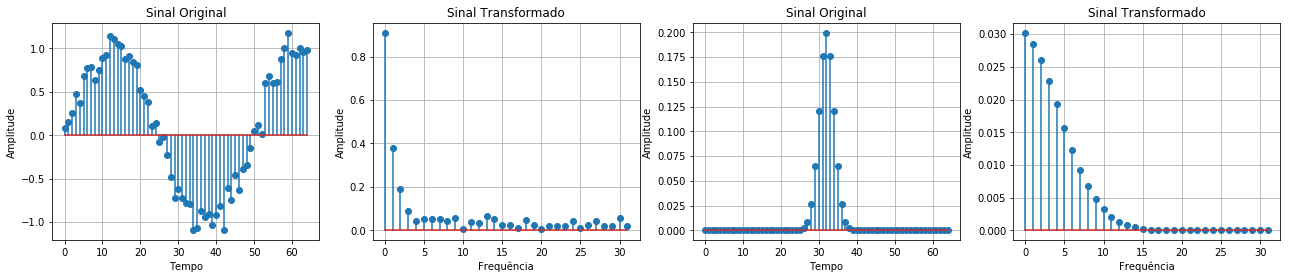

In [0]:
# Construção do expectro da frequência dos sinais x e h e seus respectivos plots
x_freq = np.fft.fft(x)
h_freq = np.fft.fft(h)
x_freq_real = 2*np.abs(x_freq/len(n))
h_freq_real = 2*np.abs(h_freq/len(n))

freq = np.fft.fftfreq(len(n))
masc = freq > 0

plt.subplot(1,4,1)
plt.title('Sinal Original')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.grid()
plt.stem(x)
plt.subplot(1,4,2)
plt.title('Sinal Transformado')
plt.xlabel('Frequência')
plt.ylabel('Amplitude')
plt.grid()
plt.stem(x_freq_real[masc])
plt.subplot(1,4,3)
plt.title('Sinal Original')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.grid()
plt.stem(h)
plt.subplot(1,4,4)
plt.title('Sinal Transformado')
plt.xlabel('Frequência')
plt.ylabel('Amplitude')
plt.grid()
plt.stem(h_freq_real[masc])

 Multiplicação ponto a ponto dos dois espectros

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<StemContainer object of 3 artists>

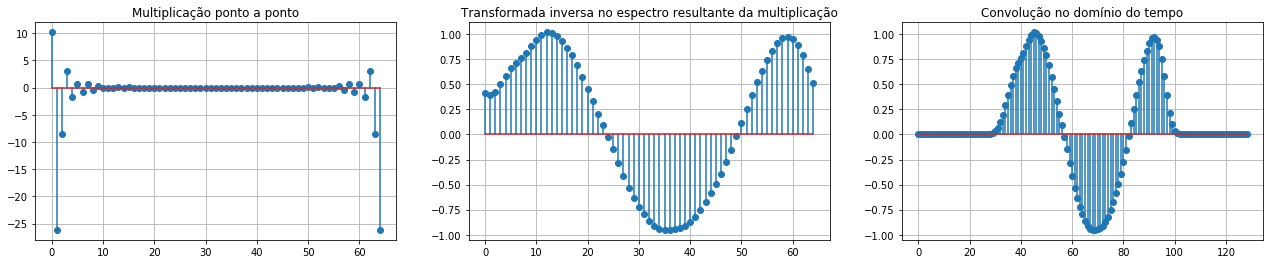

In [0]:
y = x_freq * h_freq

y_ifft = np.fft.ifft(y)
y_ifft = np.fft.fftshift(y_ifft)

plt.subplot(1,3,1)
plt.grid()
plt.title('Multiplicação ponto a ponto')
plt.stem(y)
plt.subplot(1,3,2)
plt.grid()
plt.title('Transformada inversa no espectro resultante da multiplicação')
plt.stem(y_ifft)
plt.subplot(1,3,3)
plt.grid()
plt.title('Convolução no domínio do tempo')
plt.stem(y_py)

Observa-se que os processos de filtração não dão resultados idênticos. Nota-se, inclusive que a o método de filtração via fft, multiplicação ponto a ponto e depois ifft se mostra muito mais eficaz.

## [2.5 pontos] Questão 4 - Transformada Rápida de Fourier

Considere que o código abaixo faz a transformação de um dado sinal, levando-o do domínio do tempo para o domínio da frequência utilizando o algoritmo da Transformada Rápida de Fourier (*Fast Fourier Transform*), através da seguinte definição matemática:

\begin{equation}
X_{k} = \text{par}_{k} + e^{-\frac{2i\pi k}{N}} \cdot \text{impar}_k\\
X_{k+\frac{N}{2}} = \text{par}_{k} - e^{-\frac{2i\pi k}{N}} \cdot \text{impar}_k
\end{equation}

Dito isso, implemente uma nova função chamada `ifft` que realiza a transformada rápida inversa, capaz de trazer o sinal do domínio da frequência para o domínio do tempo. Depois disso, compare o resultado obtido com a função nativa do python `np.fft.ifft`.

1. Implemente a função `ifft`;
2. Utilizando a transformada rápida de Fourier, leve o sinal original para o domínio da frequência;
3. Realize a reconstrução do sinal através da função `ifft` que foi desenvolvida;
4. Compare graficamente e numericamente os resultados obtidos com a função `np.fft.ifft` mostrando que os resultados são equivalentes.


In [0]:
def fft(x):
  
  N = len(np.array(x))
  
  if N == 1:
    return np.array(x)
  
  else:

    Ypar   = fft(x[0::2])
    Yimpar = fft(x[1::2])
    
    Y = np.zeros(len(x), dtype='complex')
    
    for k in range(0, N//2):
      
      Y[k]      = Ypar[k] + np.exp(-2j * np.pi * k / N) * Yimpar[k] 
      Y[k+N//2] = Ypar[k] - np.exp(-2j * np.pi * k / N) * Yimpar[k] 
   
    return Y 

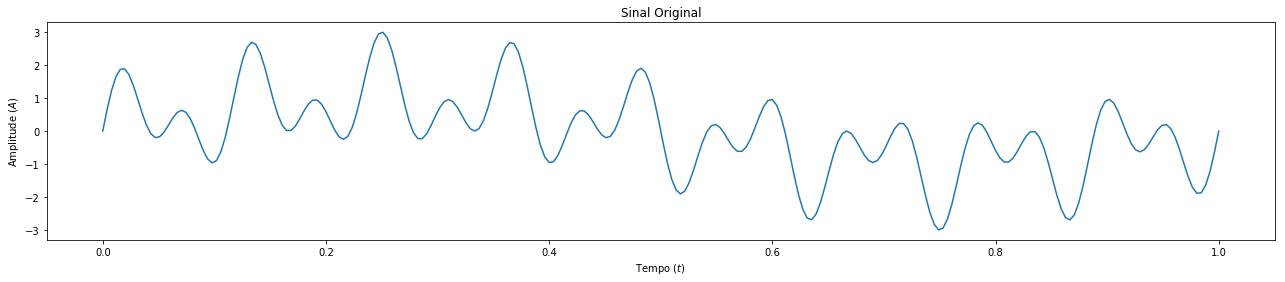

In [0]:
t = np.linspace(0, 1, 2**8)

sinal = np.sin(2 * np.pi * t * 17) + np.sin(2 * np.pi * t * 9) + np.sin(2 * np.pi * t * 1)

plt.figure()
plt.plot(t, sinal)
plt.title('Sinal Original')
plt.xlabel('Tempo $(t)$')
plt.ylabel('Amplitude $(A)$')
plt.show()

##Resolução da Questão 4

São idênticas ?  True


/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


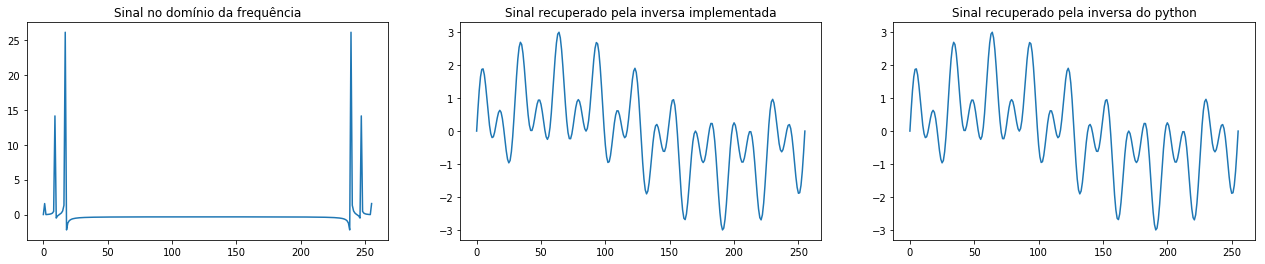

In [0]:
def ifft(x):
  
  N = len(np.array(x))
  
  if N == 1:
    return np.array(x)
  
  else:

    Ypar   = ifft(x[0::2])
    Yimpar = ifft(x[1::2])
    
    Y = np.zeros(len(x), dtype='complex')
    
    for k in range(0, N//2):
      
      Y[k]      = (Ypar[k] + np.exp(2j * np.pi * k / N) * Yimpar[k]) 
      Y[k+N//2] = (Ypar[k] - np.exp(2j * np.pi * k / N) * Yimpar[k]) 
      
    return Y/(2*N)*len(Y)                                                       #Retornando o sinal normalizado
  
  
sinal_freq = fft(sinal)
sinal_rec = ifft(sinal_freq)
sinal_rec_py = np.fft.ifft(sinal_freq)

# Função que verifica se os resultados estão próximos
print('São idênticas ? ', np.allclose(ifft(sinal_freq), np.fft.ifft(sinal_freq)))

plt.subplot(1,3,1)
plt.title('Sinal no domínio da frequência')
plt.plot(sinal_freq)
plt.subplot(1,3,2)
plt.title('Sinal recuperado pela inversa implementada')
plt.plot(sinal_rec)
plt.subplot(1,3,3)
plt.title('Sinal recuperado pela inversa do python')
plt.plot(sinal_rec_py)